# **Optimización del Diagnóstico de Diabetes mediante Modelos de Machine Learning y Algoritmo Genético**

**Integrantes:  Diego Guerrero, Brayan Sánchez, Dana Villamizar**

## Introducción

La diabetes mellitus es una enfermedad crónica que afecta a millones de personas en todo el mundo y cuya prevalencia continúa en aumento. Esta condición puede generar complicaciones graves si no se detecta y trata a tiempo, por lo que un diagnóstico temprano y preciso resulta fundamental para mejorar la calidad de vida de los pacientes y reducir la carga sobre los sistemas de salud. En este contexto, la inteligencia artificial (IA), y en particular el aprendizaje automático (machine learning), ofrece herramientas prometedoras para apoyar la toma de decisiones clínicas mediante modelos predictivos basados en datos. Este proyecto propone el desarrollo de un sistema automatizado para la predicción de diabetes, haciendo uso de modelos de machine learning combinados con un algoritmo genético, con el fin de optimizar la selección de características y mejorar el desempeño del diagnóstico.

## Motivación

El diagnóstico clínico de la diabetes puede ser un proceso complejo, especialmente en sus etapas tempranas, cuando los síntomas son sutiles o inespecíficos. Dado que un diagnóstico precoz puede prevenir complicaciones a largo plazo y reducir costos en el sistema de salud, resulta urgente implementar métodos más eficientes, precisos y accesibles. La aplicación de modelos de aprendizaje automático en este campo ha demostrado ser efectiva, sin embargo, su rendimiento depende en gran medida de la calidad y relevancia de las características utilizadas. Por ello, incorporar un algoritmo genético que permita identificar las combinaciones de variables más significativas constituye una estrategia valiosa para mejorar los resultados de los modelos predictivos.

## Objetivos

### Objetivo general:
Desarrollar un sistema de predicción de diabetes tipo 2 mediante modelos de aprendizaje automático, optimizados a través de un algoritmo genético para la selección de características relevantes.

### Objetivos específicos:

* Implementar y evaluar diferentes modelos de machine learning en el conjunto de datos Pima Indians Diabetes.

* Aplicar un algoritmo genético para identificar el subconjunto óptimo de variables que maximicen la precisión del modelo.

* Comparar el rendimiento de los modelos con y sin selección de características automatizada.

* Analizar la viabilidad de aplicar este sistema en contextos clínicos reales como herramienta de apoyo al diagnóstico.

## Información del dataset

Obtenido de Kaggle.

---


Contiene 768 datos

## **LIBRERIAS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SISTEMAS🧠/7mo semestre🎢/INTELIGENCIA ARTIFICIAL I/PROYECTO/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Séptimo semestre/Inteligencia Artificial I/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Mostrar estructura general
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### **LIMPIEZA DEL DATASET**

In [ ]:
# Reemplazar ceros por NaN en columnas donde 0 no tiene sentido
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Imputar con mediana
imputer = SimpleImputer(strategy='median')
df[cols_with_invalid_zeros] = imputer.fit_transform(df[cols_with_invalid_zeros])

# Normalizar características numéricas
scaler = MinMaxScaler()
features = df.drop("Outcome", axis=1)
normalized_features = scaler.fit_transform(features)
df_normalized = pd.DataFrame(normalized_features, columns=features.columns)
df_normalized["Outcome"] = df["Outcome"]

### **ANALISIS DEL DATASET**

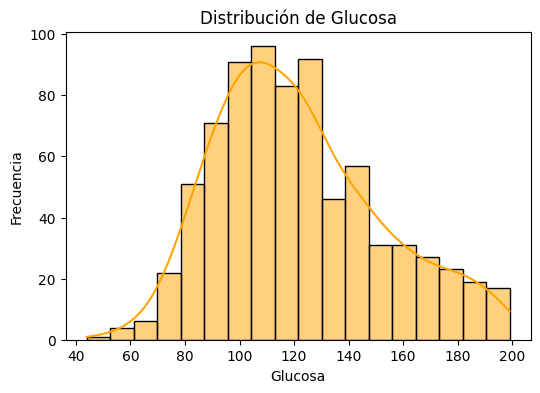

In [ ]:
# 1. Histograma de Glucosa
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucose'], kde=True, color='orange')
plt.title("Distribución de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.show()

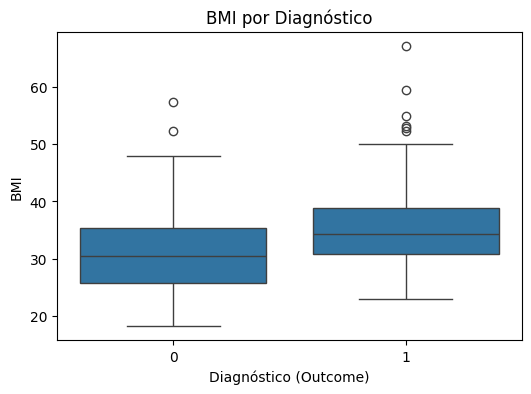

In [ ]:
# 2. Boxplot de BMI según diagnóstico
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI por Diagnóstico")
plt.xlabel("Diagnóstico (Outcome)")
plt.ylabel("BMI")
plt.show()

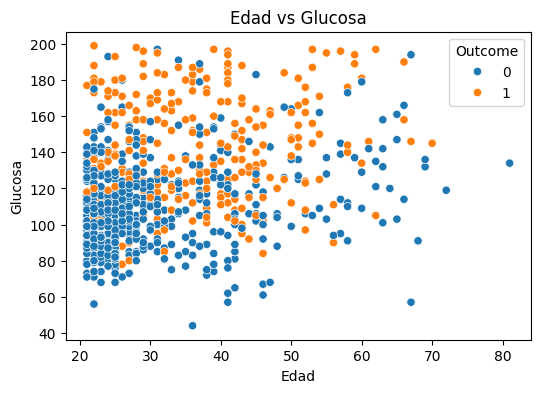

In [ ]:
# 3. Dispersión Edad vs Glucosa por diagnóstico
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title("Edad vs Glucosa")
plt.xlabel("Edad")
plt.ylabel("Glucosa")
plt.show()

<Figure size 600x400 with 0 Axes>

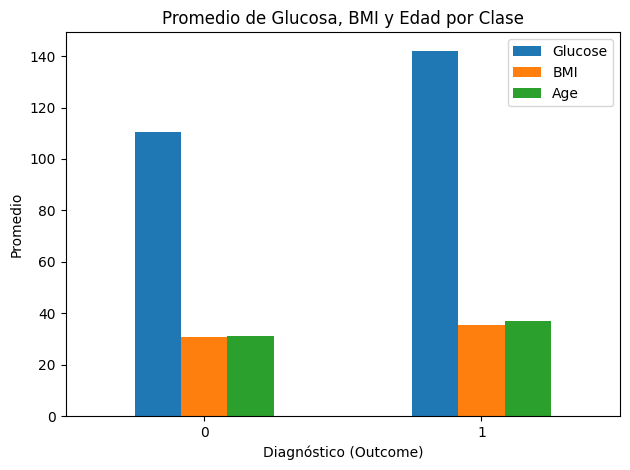

In [ ]:
# 4. Promedios de variables seleccionadas por clase
plt.figure(figsize=(6, 4))
df.groupby('Outcome')[["Glucose", "BMI", "Age"]].mean().plot(kind='bar')
plt.title("Promedio de Glucosa, BMI y Edad por Clase")
plt.xlabel("Diagnóstico (Outcome)")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

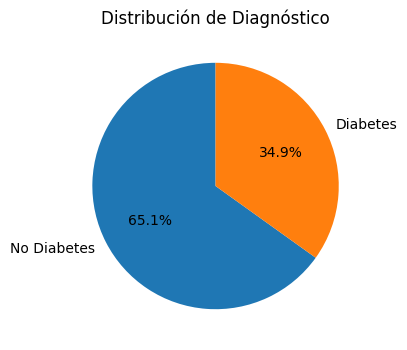

In [ ]:
# 5. Gráfico de torta para el diagnóstico
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=["No Diabetes", "Diabetes"], startangle=90)
plt.title("Distribución de Diagnóstico")
plt.ylabel("")
plt.show()


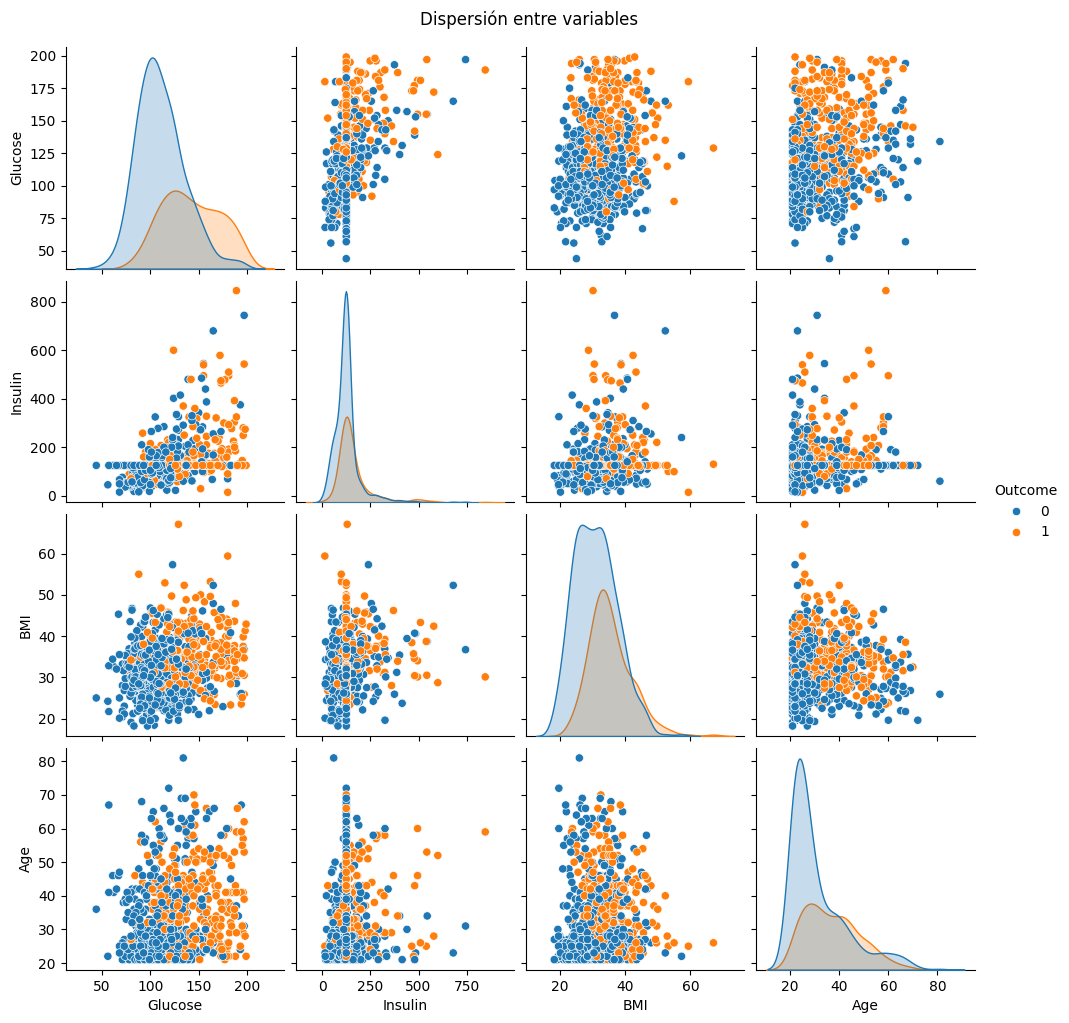

In [ ]:
sns.pairplot(df, hue='Outcome', vars=["Glucose", "Insulin", "BMI", "Age"])
plt.suptitle("Dispersión entre variables", y=1.02)
plt.show()

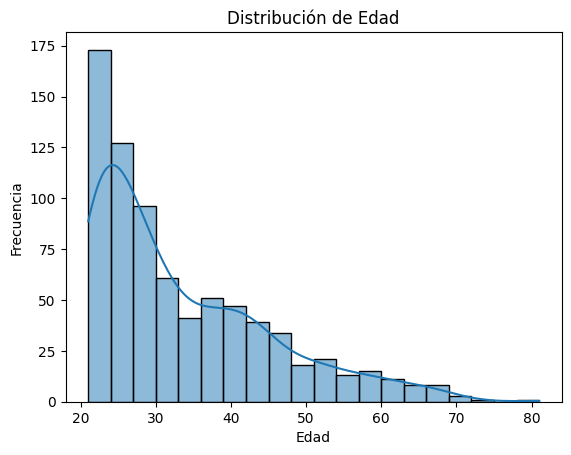

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

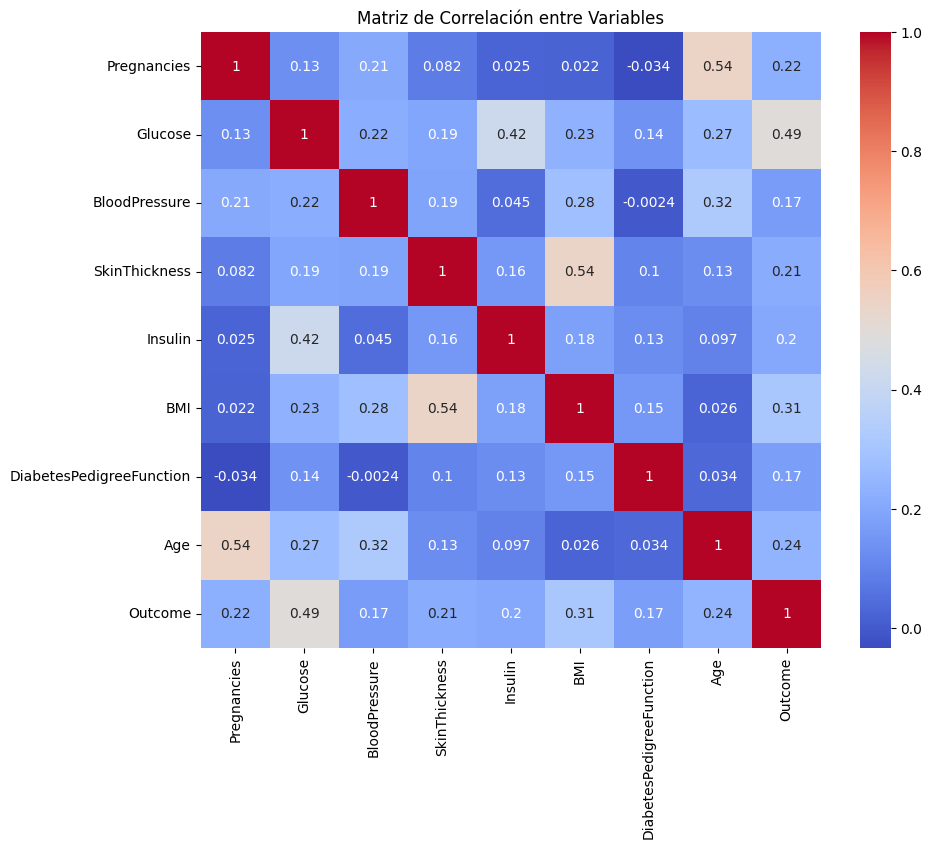

In [ ]:
# 6. Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables")
plt.show()

### **MODELOS**

In [ ]:
# Division de la data para los modelos
# Usamos el df_normalized generado antes
X = df_normalized.drop("Outcome", axis=1)
y = df_normalized["Outcome"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# -------------------------------------------
# Algoritmo Genético para selección de features
# -------------------------------------------
def fitness(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0
    X_selected = X_train.iloc[:, selected_features]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Inicializar población
def create_population(size, num_features):
    return [random.choices([0, 1], k=num_features) for _ in range(size)]

# Selección y cruce
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-2)
    return parent1[:point] + parent2[point:]

def mutate(individual, mutation_rate=0.1):
    return [bit if random.random() > mutation_rate else 1 - bit for bit in individual]

# GA principal
def genetic_algorithm(X_train, generations=10, pop_size=10):
    num_features = X_train.shape[1]
    population = create_population(pop_size, num_features)
    best_individual = None
    best_score = 0

    for gen in range(generations):
        scores = [fitness(ind) for ind in population]
        ranked = sorted(zip(population, scores), key=lambda x: x[1], reverse=True)

        print(f"Generación {gen+1} - Mejor precisión: {ranked[0][1]:.4f}")
        if ranked[0][1] > best_score:
            best_score = ranked[0][1]
            best_individual = ranked[0][0]

        selected = [ind for ind, score in ranked[:4]]
        population = selected.copy()
        while len(population) < pop_size:
            parent1, parent2 = random.sample(selected, 2)
            child = mutate(crossover(parent1, parent2))
            population.append(child)

    return best_individual, best_score

best_ind, best_score = genetic_algorithm(X_train)

selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]
print(f"\nFeatures seleccionadas (índices): {selected_features}")
print(f"Precisión promedio GA: {best_score:.4f}")

Generación 1 - Mejor precisión: 0.7598
Generación 2 - Mejor precisión: 0.7672
Generación 3 - Mejor precisión: 0.7728
Generación 4 - Mejor precisión: 0.7727
Generación 5 - Mejor precisión: 0.7764
Generación 6 - Mejor precisión: 0.7783
Generación 7 - Mejor precisión: 0.7858
Generación 8 - Mejor precisión: 0.7728
Generación 9 - Mejor precisión: 0.7839
Generación 10 - Mejor precisión: 0.7932

Features seleccionadas (índices): [0, 1, 5, 7]
Precisión promedio GA: 0.7932


In [ ]:
selected = features.columns[selected_features]
print(selected)

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


In [ ]:
# Usar solo las características seleccionadas
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

# -------------------------------------------
# Entrenamiento de Modelos
# -------------------------------------------

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

# SVM
svm = SVC()
svm.fit(X_train_sel, y_train)
y_pred_svm = svm.predict(X_test_sel)
print("\nSVM")
print(classification_report(y_test, y_pred_svm))

# Red Neuronal (MLP)

mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
mlp.fit(X_train_sel, y_train)
y_pred_mlp = mlp.predict(X_test_sel)
print("\nRed Neuronal (MLP)")
print(classification_report(y_test, y_pred_mlp))



Random Forest
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.73      0.73       231


SVM
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231


Red Neuronal (MLP)
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73 

In [ ]:
# Número de capas (entrada + ocultas + salida)
print("Número total de capas:", mlp.n_layers_)

# Estructura de capas ocultas
print("Capas ocultas:", mlp.hidden_layer_sizes)

# Número de neuronas por capa (incluyendo entrada y salida)
layer_sizes = [mlp.coefs_[0].shape[0]]  # Tamaño capa de entrada
layer_sizes += [w.shape[1] for w in mlp.coefs_]  # Ocultas + salida
print("Tamaño de cada capa:", layer_sizes)

# Pesos y sesgos
for i, (w, b) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    print(f"\nCapa {i + 1} → {i + 2}")
    print("  Pesos:", w.shape)
    print("  Sesgos:", b.shape)


Número total de capas: 4
Capas ocultas: (10, 10)
Tamaño de cada capa: [4, 10, 10, 1]

Capa 1 → 2
  Pesos: (4, 10)
  Sesgos: (10,)

Capa 2 → 3
  Pesos: (10, 10)
  Sesgos: (10,)

Capa 3 → 4
  Pesos: (10, 1)
  Sesgos: (1,)


In [ ]:
print("X_train_sel shape:", X_train_sel.shape)
print("X_test_sel shape:", X_test_sel.shape)

print("\nPrimeras filas de X_train_sel:")
print(X_train_sel.head())

print("\nPrimeras filas de X_test_sel:")
print(X_test_sel.head())

print("Índices de características seleccionadas:", selected_features)
print("Columnas seleccionadas:")
print(X_train.columns[selected_features])


X_train_sel shape: (537, 4)
X_test_sel shape: (231, 4)

Primeras filas de X_train_sel:
     Pregnancies   Glucose       BMI       Age
334     0.058824  0.329032  0.116564  0.016667
139     0.294118  0.393548  0.382413  0.116667
485     0.000000  0.587097  0.492843  0.050000
547     0.235294  0.561290  0.304703  0.116667
18      0.058824  0.380645  0.513292  0.200000

Primeras filas de X_test_sel:
     Pregnancies   Glucose       BMI       Age
668     0.352941  0.348387  0.323108  0.366667
324     0.117647  0.438710  0.357873  0.000000
624     0.117647  0.412903  0.257669  0.000000
690     0.470588  0.406452  0.130879  0.216667
473     0.411765  0.593548  0.239264  0.483333
Índices de características seleccionadas: [0, 1, 5, 7]
Columnas seleccionadas:
Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')
